In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.282265,53228400
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.056633,54119000
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.426266,64059600
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.239563,54976600
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,34.687004,62013600
...,...,...,...,...,...,...,...
5932,2023-08-02,333.630005,333.630005,326.359985,327.500000,327.500000,27761300
5933,2023-08-03,326.000000,329.880005,325.950012,326.660004,326.660004,18253700
5934,2023-08-04,331.880005,335.140015,327.239990,327.779999,327.779999,23727700
5935,2023-08-07,328.369995,331.109985,327.519989,330.109985,330.109985,17741500


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2000-01-03,58.281250
1,2000-01-04,56.312500
2,2000-01-05,56.906250
3,2000-01-06,55.000000
4,2000-01-07,55.718750
...,...,...
5932,2023-08-02,327.500000
5933,2023-08-03,326.660004
5934,2023-08-04,327.779999
5935,2023-08-07,330.109985


In [3]:
df['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5932    2023-08-02
5933    2023-08-03
5934    2023-08-04
5935    2023-08-07
5936    2023-08-08
Name: Date, Length: 5937, dtype: object

In [4]:
import datetime

In [5]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2000-01-03')
datetime_object

datetime.datetime(2000, 1, 3, 0, 0)

In [6]:
df

,Date,Close
0,2000-01-03,58.281250
1,2000-01-04,56.312500
2,2000-01-05,56.906250
3,2000-01-06,55.000000
4,2000-01-07,55.718750
...,...,...
5932,2023-08-02,327.500000
5933,2023-08-03,326.660004
5934,2023-08-04,327.779999
5935,2023-08-07,330.109985


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\PC\AppData\Local\Temp\ipykernel_13176\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5932   2023-08-02
5933   2023-08-03
5934   2023-08-04
5935   2023-08-07
5936   2023-08-08
Name: Date, Length: 5937, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2000-01-03,58.281250
2000-01-04,56.312500
2000-01-05,56.906250
2000-01-06,55.000000
2000-01-07,55.718750
...,...
2023-08-02,327.500000
2023-08-03,326.660004
2023-08-04,327.779999


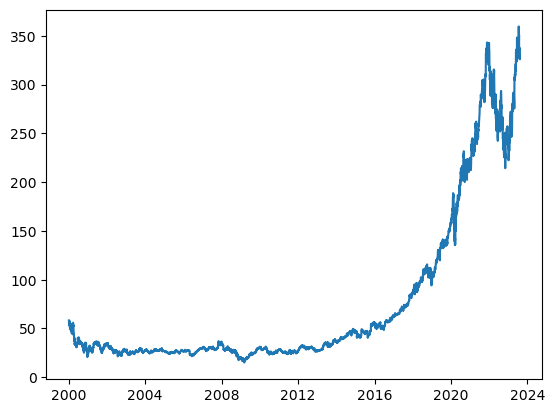

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

In [11]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-08-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
592,2023-08-02,338.369995,335.920013,336.339996,327.500000
593,2023-08-03,335.920013,336.339996,327.500000,326.660004
594,2023-08-04,336.339996,327.500000,326.660004,327.779999
595,2023-08-07,327.500000,326.660004,327.779999,330.109985


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((597,), (597, 3, 1), (597,))

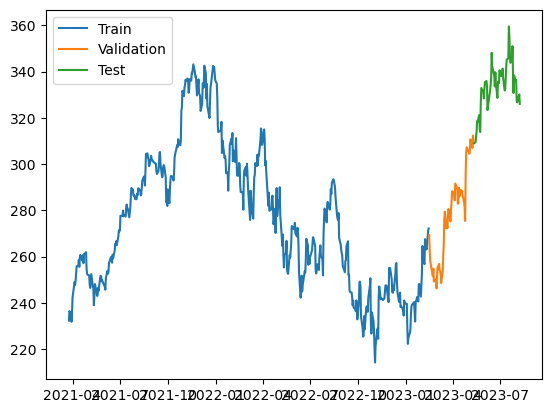

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
pip install tensorflow==2.13.0

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.11.0
    Uninstalling tensorflow-intel-2.11.0:
      S

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
15/15 [==============================] - 6s 82ms/step - loss: 76338.6406 - mean_absolute_error: 274.6234 - val_loss: 76802.8828 - val_mean_absolute_error: 276.4450
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 75470.0312 - mean_absolute_error: 273.0378 - val_loss: 75701.4844 - val_mean_absolute_error: 274.4461
Epoch 3/100
15/15 [==============================] - 0s 12ms/step - loss: 74125.6953 - mean_absolute_error: 270.5602 - val_loss: 73883.1328 - val_mean_absolute_error: 271.1120
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 71660.2422 - mean_absolute_error: 265.9637 - val_loss: 70425.7578 - val_mean_absolute_error: 264.6588
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 67522.1016 - mean_absolute_error: 258.0656 - val_loss: 65641.0859 - val_mean_absolute_error: 255.4600
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 61965.1250 - mean_absolute_error: 247.0328 - v

Epoch 49/100
15/15 [==============================] - 0s 11ms/step - loss: 46.2431 - mean_absolute_error: 5.4766 - val_loss: 44.2127 - val_mean_absolute_error: 4.8935
Epoch 50/100
15/15 [==============================] - 0s 14ms/step - loss: 40.6084 - mean_absolute_error: 5.1035 - val_loss: 41.8169 - val_mean_absolute_error: 5.3978
Epoch 51/100
15/15 [==============================] - 0s 12ms/step - loss: 38.9364 - mean_absolute_error: 4.9105 - val_loss: 48.4150 - val_mean_absolute_error: 5.2029
Epoch 52/100
15/15 [==============================] - 0s 13ms/step - loss: 35.9140 - mean_absolute_error: 4.7751 - val_loss: 34.5230 - val_mean_absolute_error: 4.1474
Epoch 53/100
15/15 [==============================] - 0s 11ms/step - loss: 41.2002 - mean_absolute_error: 5.0999 - val_loss: 50.8493 - val_mean_absolute_error: 6.0133
Epoch 54/100
15/15 [==============================] - 0s 13ms/step - loss: 41.8245 - mean_absolute_error: 5.1487 - val_loss: 29.0221 - val_mean_absolute_error: 4.152

15/15 [==============================] - 0s 14ms/step - loss: 28.1481 - mean_absolute_error: 4.0923 - val_loss: 28.0322 - val_mean_absolute_error: 4.4433
Epoch 99/100
15/15 [==============================] - 0s 14ms/step - loss: 29.1920 - mean_absolute_error: 4.2219 - val_loss: 26.7729 - val_mean_absolute_error: 3.7802
Epoch 100/100
15/15 [==============================] - 0s 16ms/step - loss: 28.7121 - mean_absolute_error: 4.1313 - val_loss: 33.1680 - val_mean_absolute_error: 4.0609


In [16]:
pip install --upgrade tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\PC\anaconda3\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
    File "C:\Users\PC\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\PC\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\PC\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\PC\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 

15/15 [==============================] - 1s 4ms/step


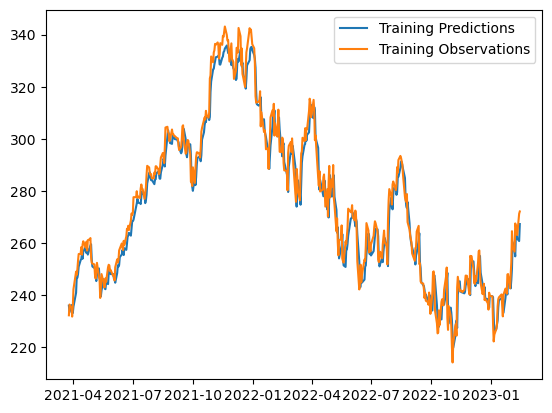

In [17]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 7ms/step


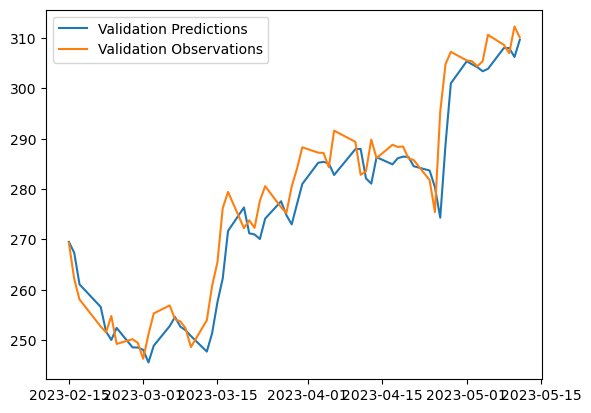

In [18]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 7ms/step


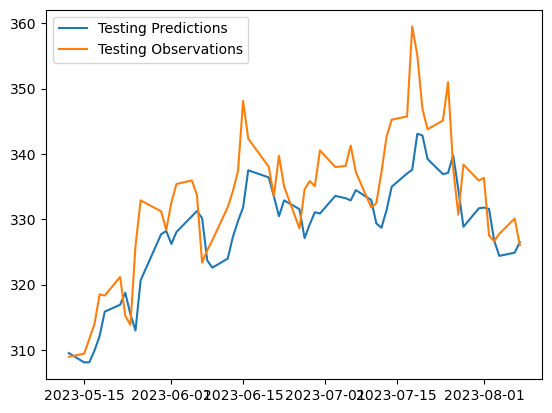

In [19]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

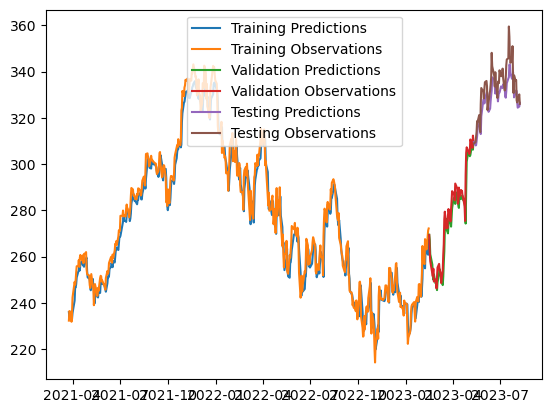

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [21]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 43ms/step


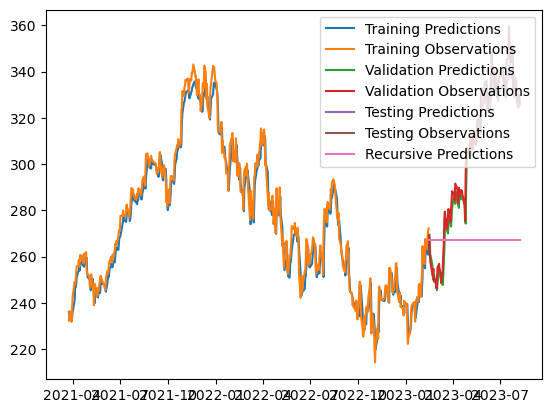

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])